In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings
import talib
import requests
import json
import time
from bs4 import BeautifulSoup

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
#Get Data
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1189987200&period2=1635897600&interval=1d&events=history&includeAdjustedClose=true'
data = pd.read_csv(url).dropna()[-1260:]

In [4]:
data['MA'] = talib.SMA(data['Close'],2)
data = data.iloc[::-1].reset_index(drop=True)

In [5]:
data = data[['Date', 'Close', 'MA']]

In [6]:
data['assetReturns'] = 1 + np.log(data['Close'] / data['Close'].shift(-1))
data = data.dropna()

In [7]:
data['strategyReturn'] = data['assetReturns']
data.loc[data['Close'].shift(-1) < data['MA'].shift(-1), 'strategyReturn'] = 1

In [132]:
data.head(20)

,Date,Close,MAC,assetReturns,strategyReturn
0,2021-11-03,4561.827637,1.048313,0.994977,0.994977
1,2021-11-02,4584.798828,1.044889,1.058420,1.058420
2,2021-11-01,4324.626953,1.040670,1.008488,1.008488
3,2021-10-31,4288.074219,1.038646,0.991275,0.991275
4,2021-10-30,4325.650391,1.036533,0.979612,0.979612
5,2021-10-29,4414.746582,1.033725,1.029289,1.029289
6,2021-10-28,4287.318848,1.029800,1.086957,1.086957
7,2021-10-27,3930.257324,1.027539,0.950161,0.950161
8,2021-10-26,4131.102051,1.026282,0.979212,0.979212
9,2021-10-25,4217.876953,1.023767,1.031300,1.031300


[187.53735447]


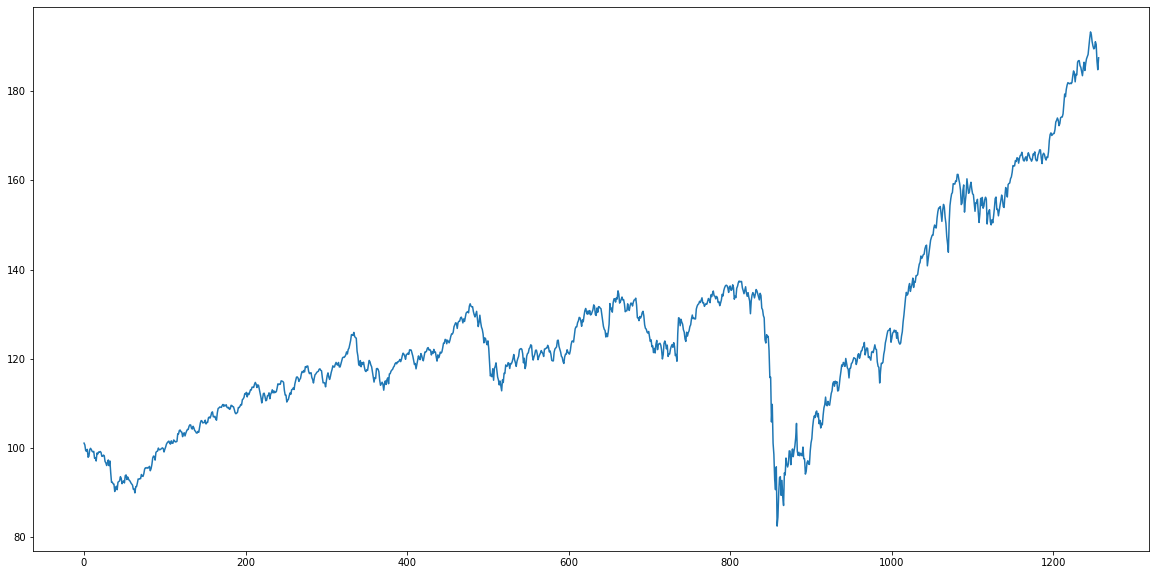

In [9]:
#NIFTY
initialPrice = 100
assetSeries = list()
for i in range(2, len(data)):
    initialPrice = initialPrice * data['assetReturns'][-i:-i+1].values
    assetSeries.append(initialPrice)
plt.plot(assetSeries)
print(assetSeries[-1])

In [42]:
fastMA = [2, 3, 5, 10, 15, 20, 60, 120, 240]
slowMA = [2, 3, 5, 10, 15, 20, 60, 120, 240]
MAcombo = []

for i in range(0,len(fastMA)-1):
    for j in range(i+1,len(slowMA)):
        combo = fastMA[i],slowMA[j]
        MAcombo.append(list(combo))

In [50]:
len(MAcombo)

36

MA: [2, 3]  Strategy Value: 18.139300608720824 No Of Trades: 241


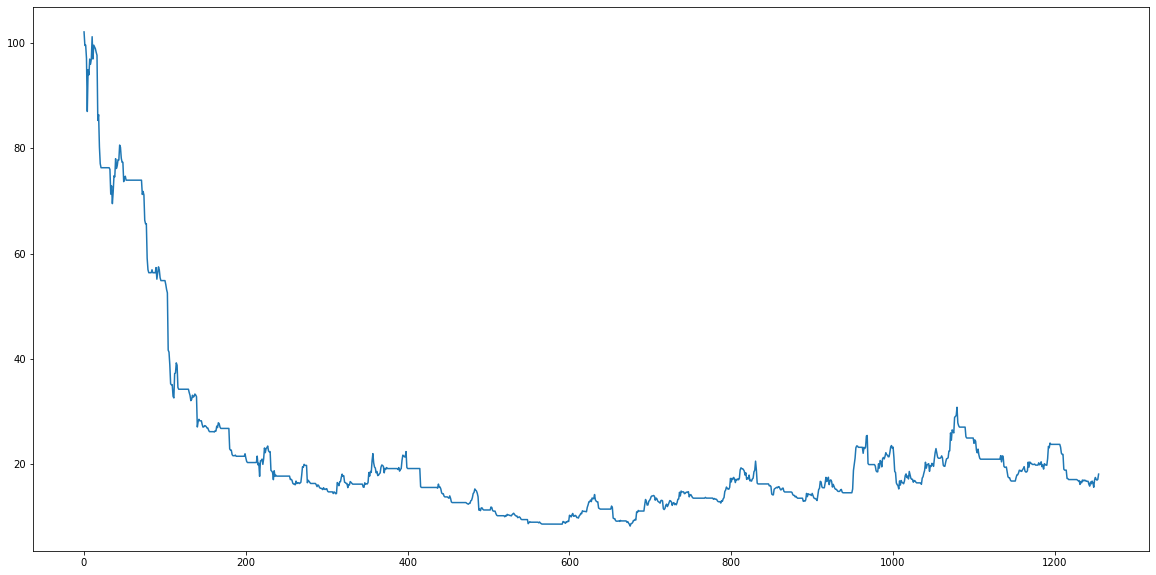

MA: [2, 5]  Strategy Value: 72.13947309477777 No Of Trades: 173


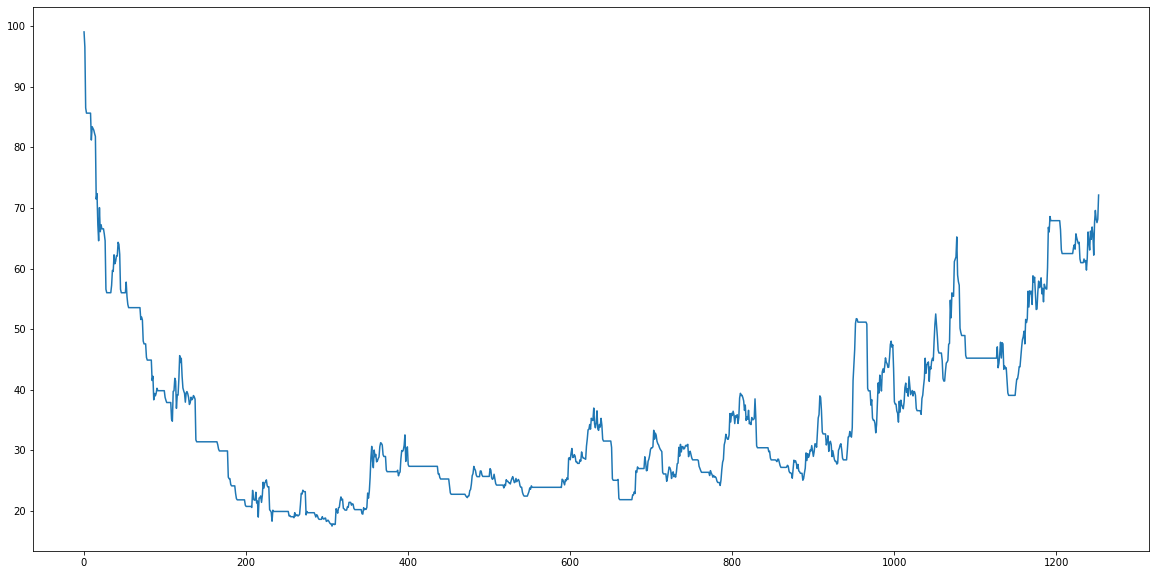

MA: [2, 10]  Strategy Value: 851.2120936695555 No Of Trades: 81


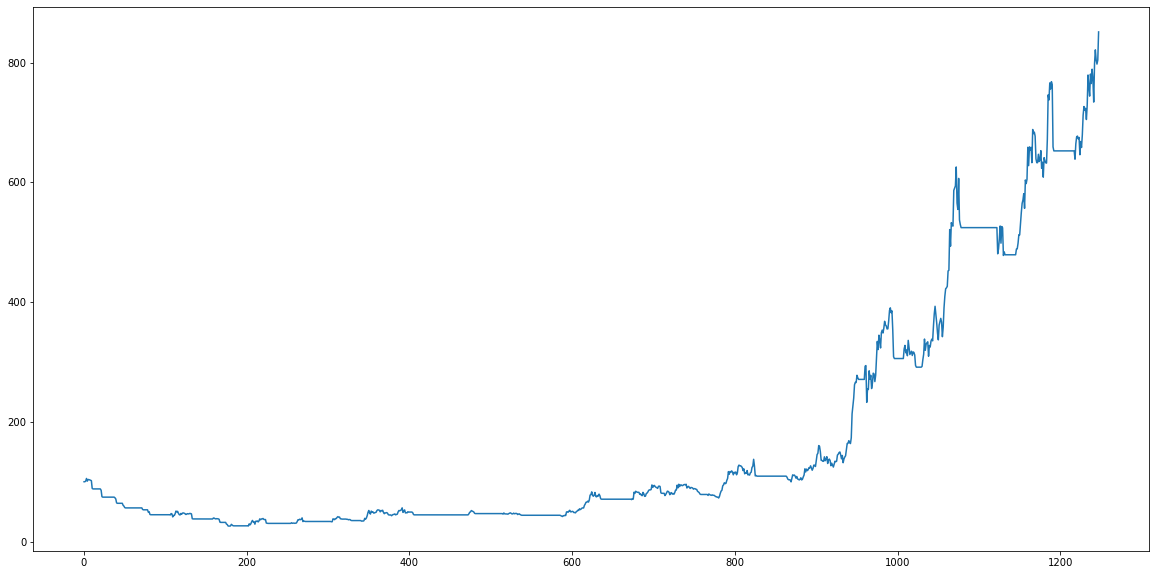

MA: [2, 15]  Strategy Value: 1296.161271233265 No Of Trades: 61


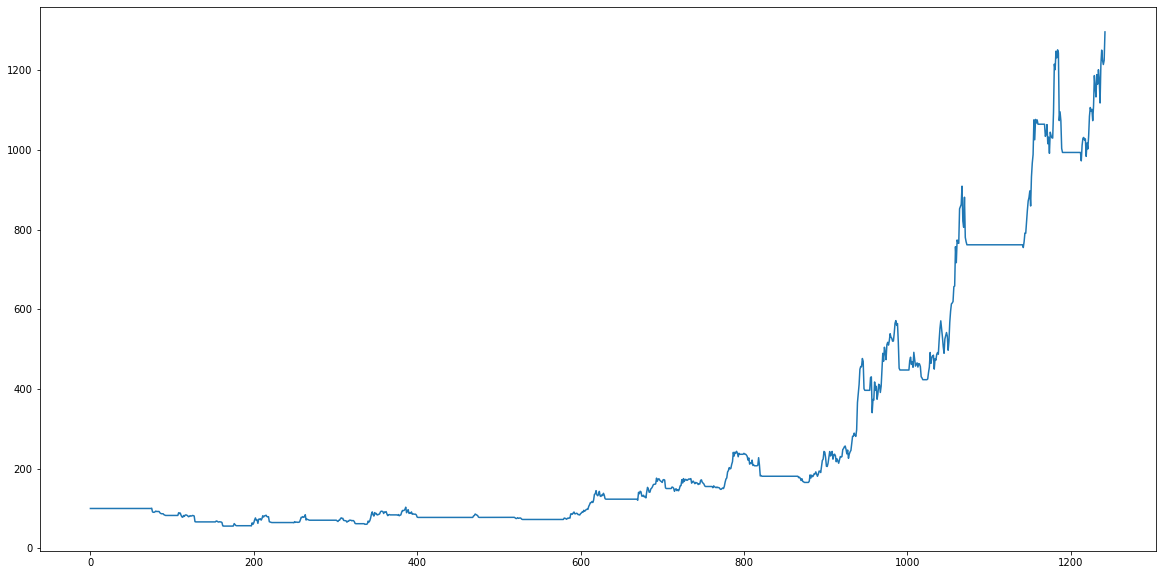

MA: [2, 20]  Strategy Value: 840.6262714204354 No Of Trades: 53


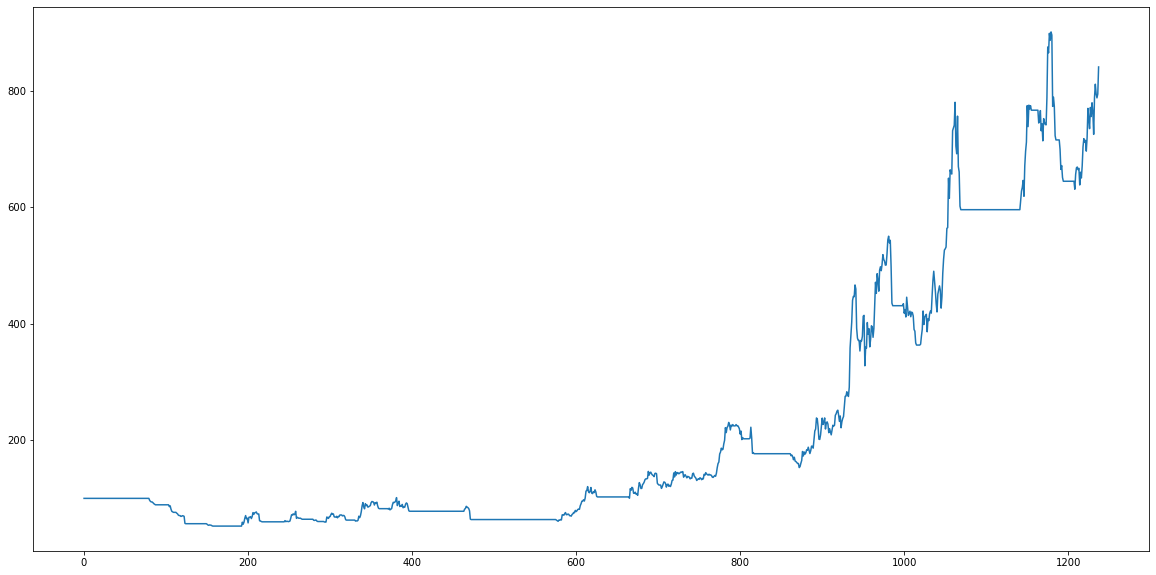

MA: [2, 60]  Strategy Value: 773.4379239179232 No Of Trades: 21


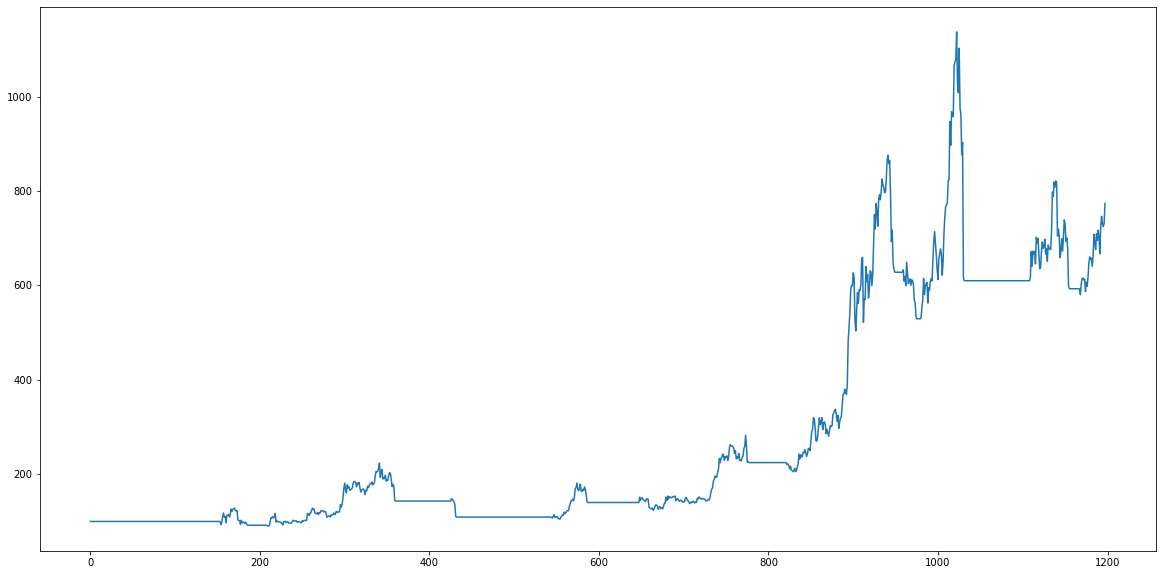

MA: [2, 120]  Strategy Value: 526.3015804250313 No Of Trades: 21


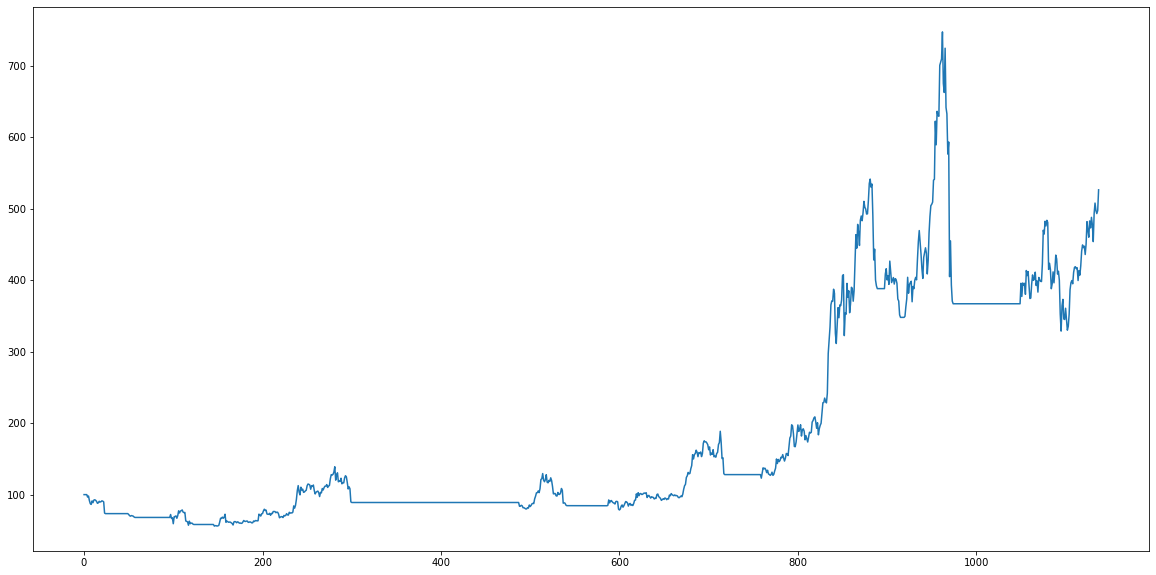

MA: [2, 240]  Strategy Value: 304.0909252971596 No Of Trades: 15


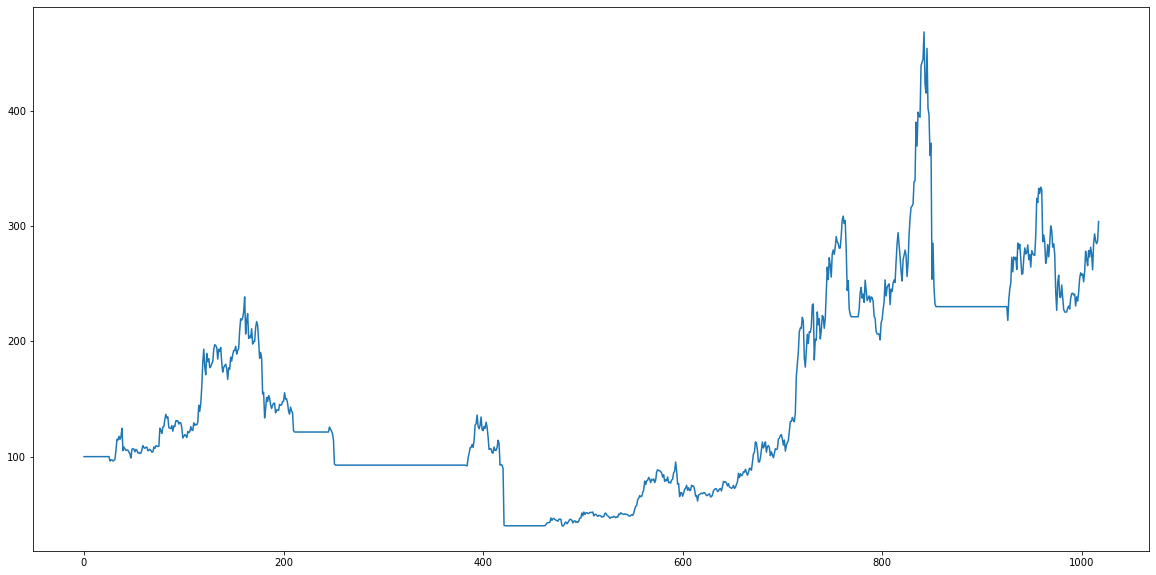

MA: [3, 5]  Strategy Value: 43.73186555600836 No Of Trades: 189


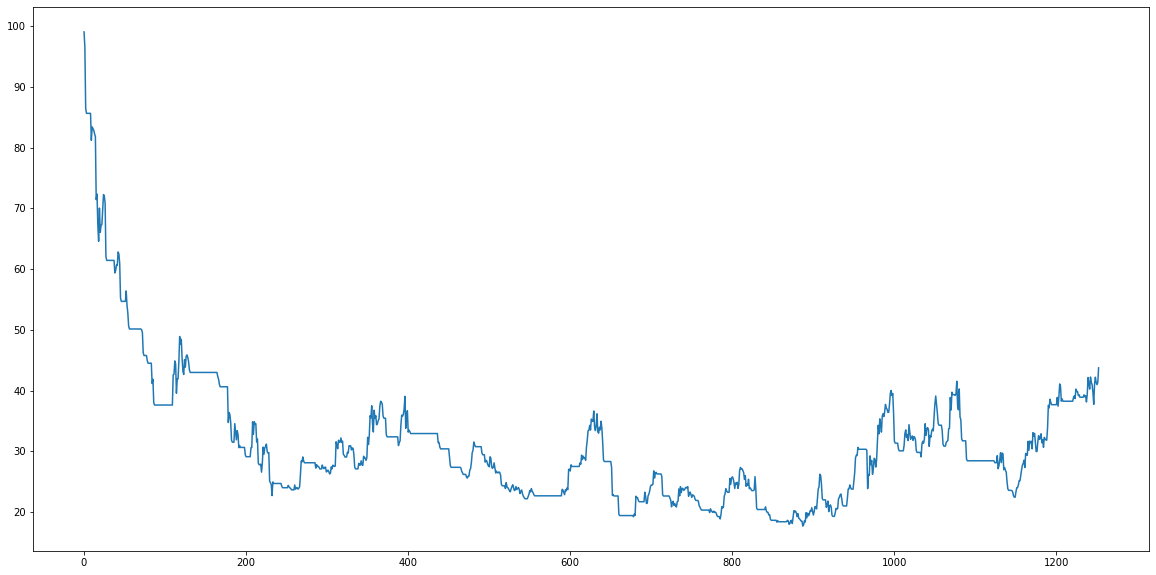

MA: [3, 10]  Strategy Value: 249.12637577247156 No Of Trades: 83


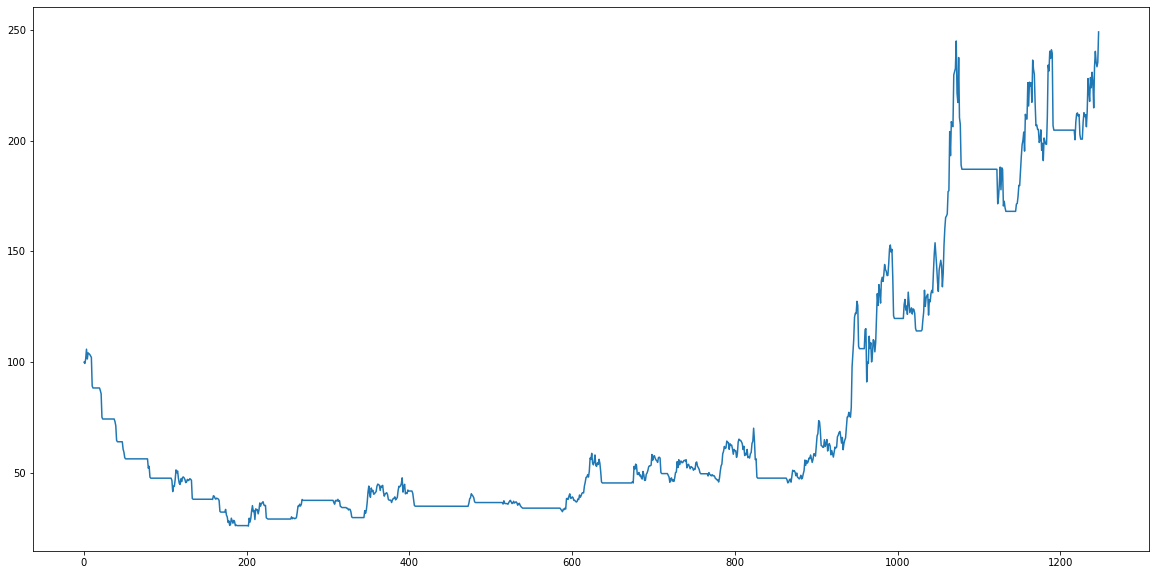

MA: [3, 15]  Strategy Value: 424.2946720774452 No Of Trades: 65


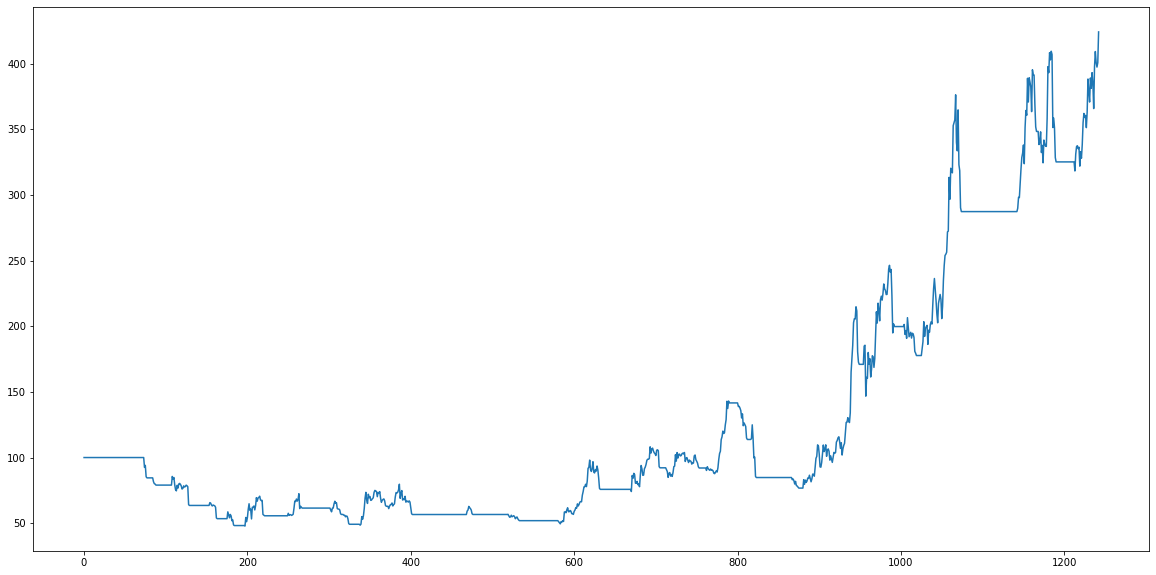

MA: [3, 20]  Strategy Value: 833.6493562267387 No Of Trades: 55


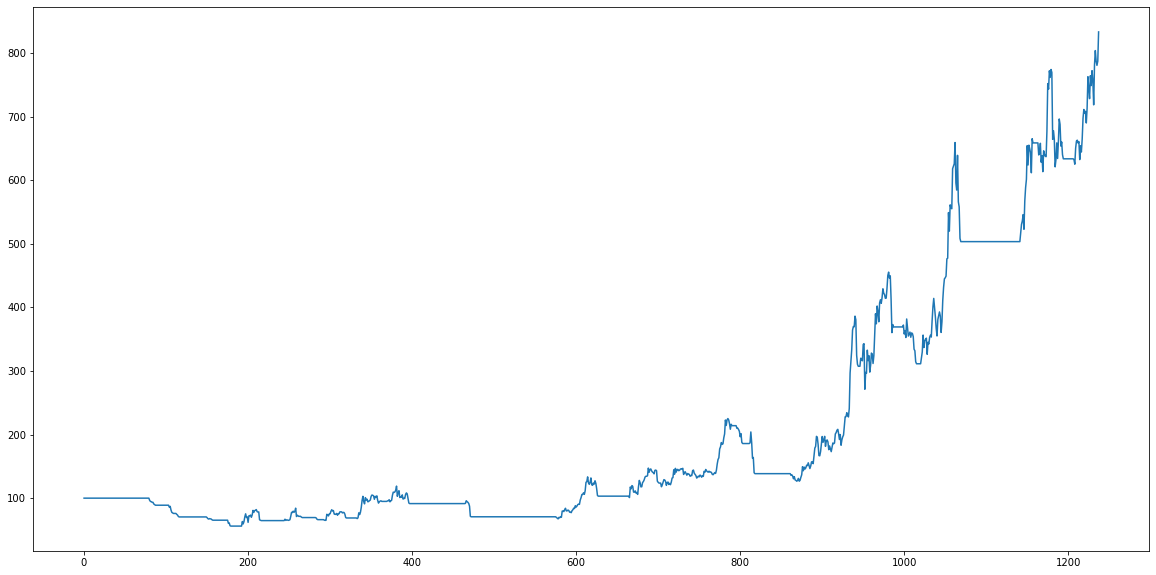

MA: [3, 60]  Strategy Value: 738.2502901893179 No Of Trades: 21


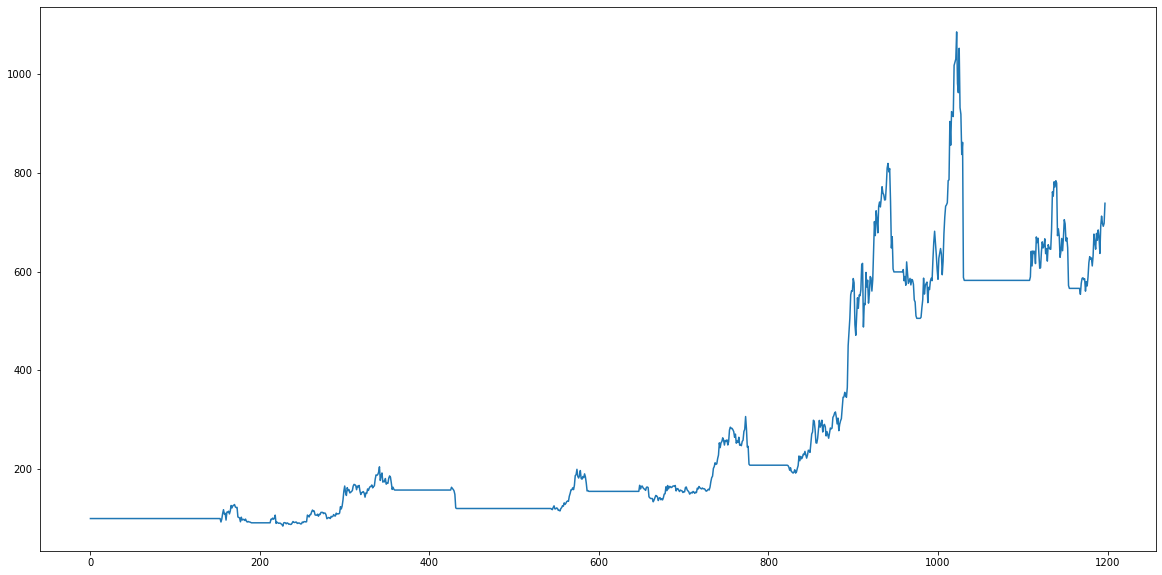

MA: [3, 120]  Strategy Value: 211.3137546832183 No Of Trades: 21


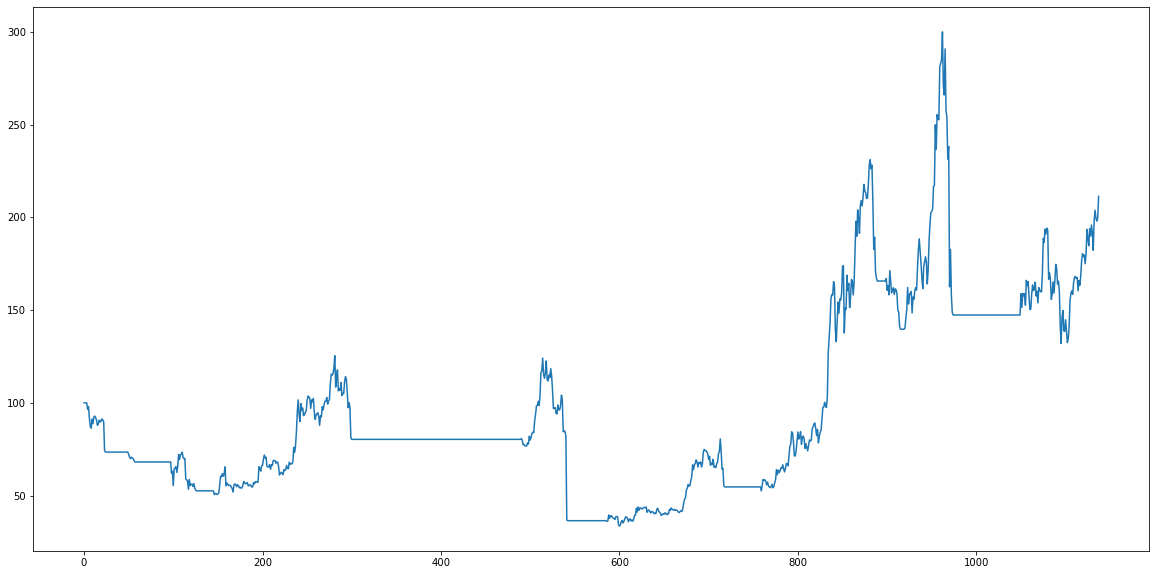

MA: [3, 240]  Strategy Value: 329.6703986946669 No Of Trades: 13


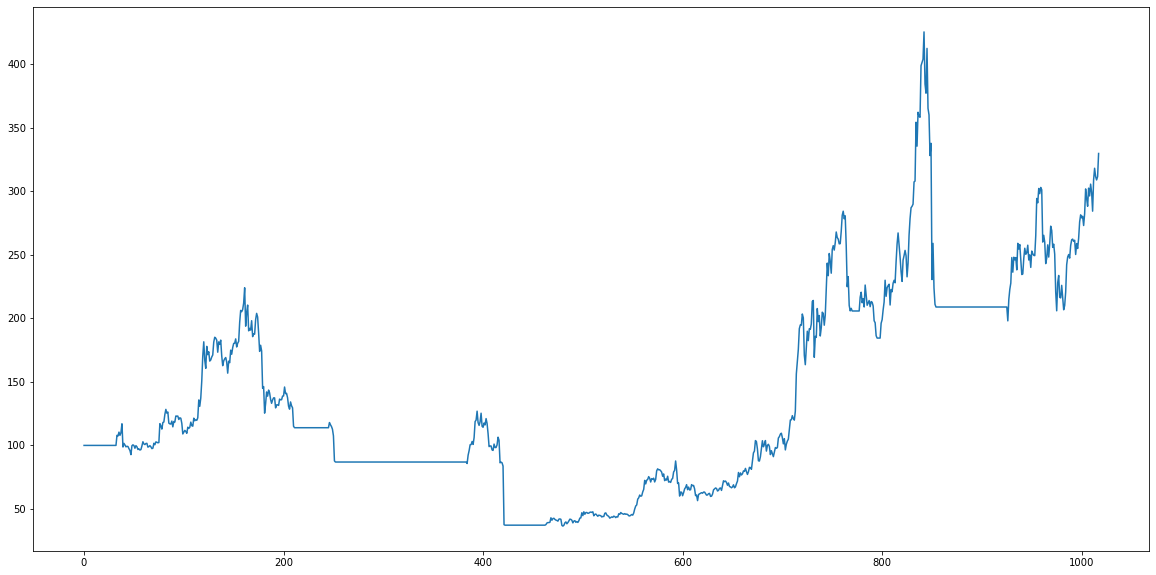

MA: [5, 10]  Strategy Value: 390.25294922303743 No Of Trades: 67


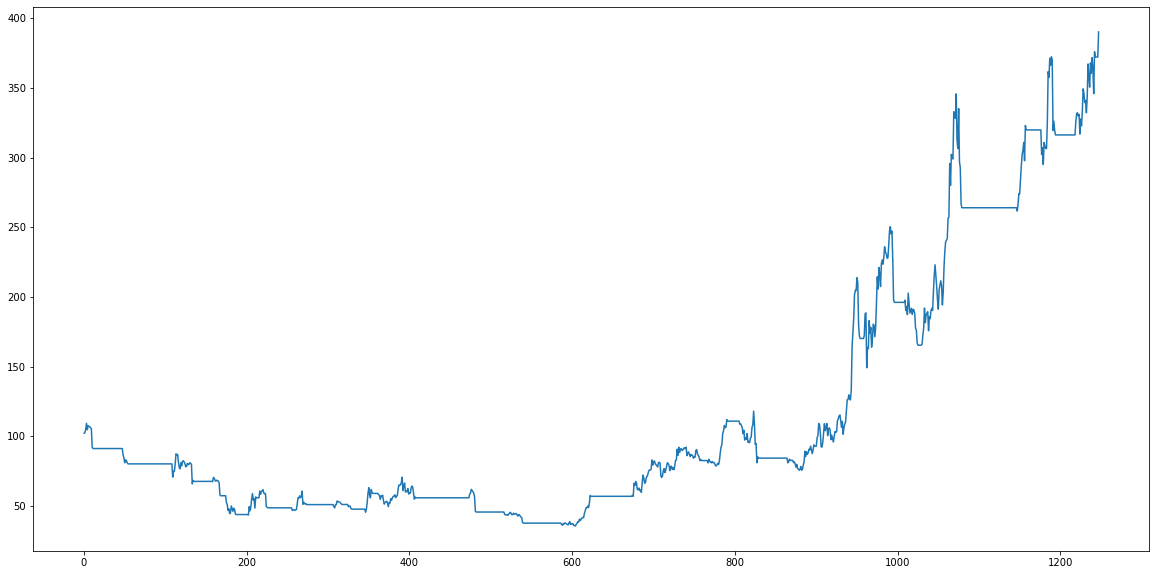

MA: [5, 15]  Strategy Value: 381.70481570204964 No Of Trades: 61


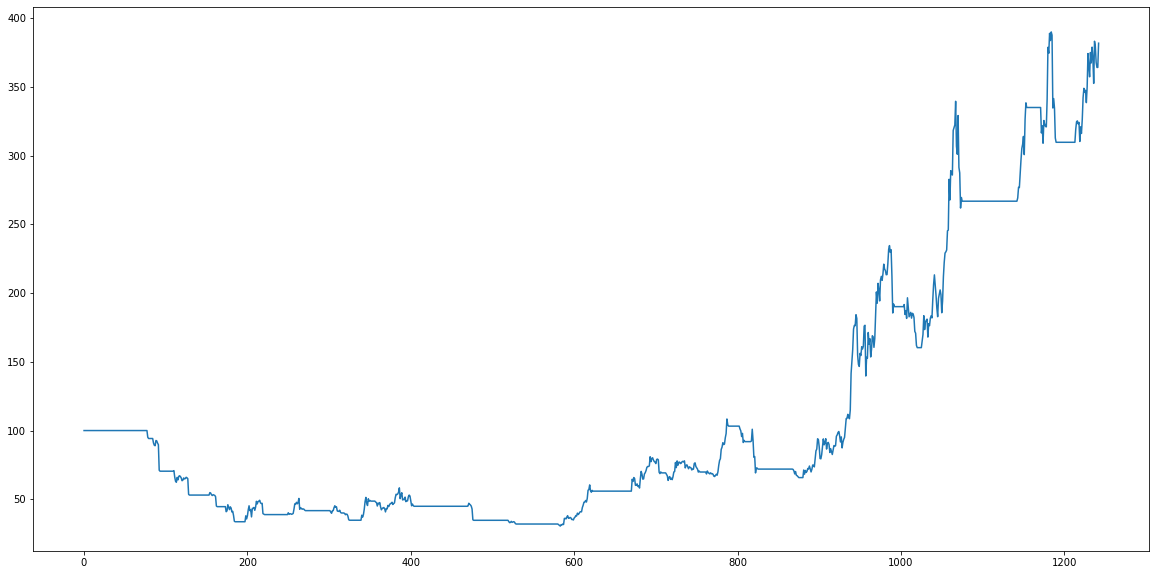

MA: [5, 20]  Strategy Value: 520.2155585104822 No Of Trades: 41


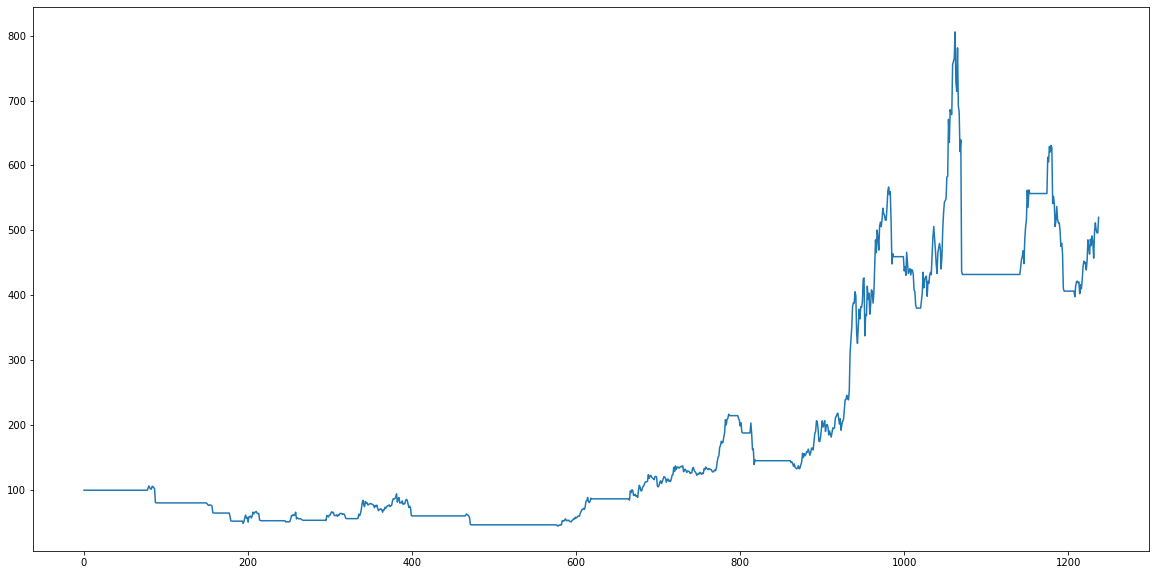

MA: [5, 60]  Strategy Value: 728.1222647640719 No Of Trades: 19


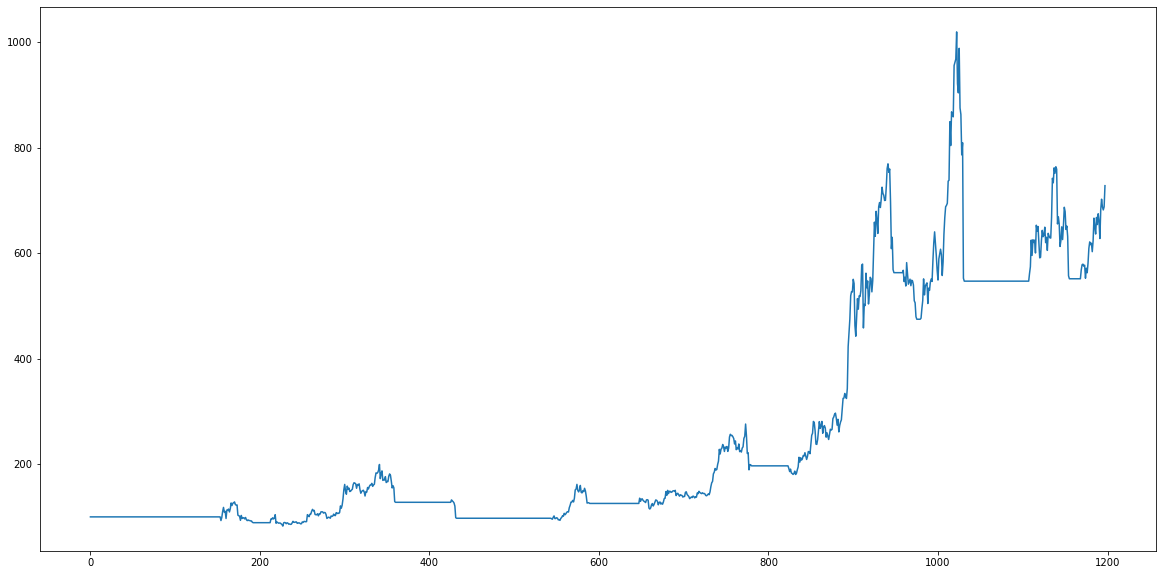

MA: [5, 120]  Strategy Value: 163.02062013569042 No Of Trades: 19


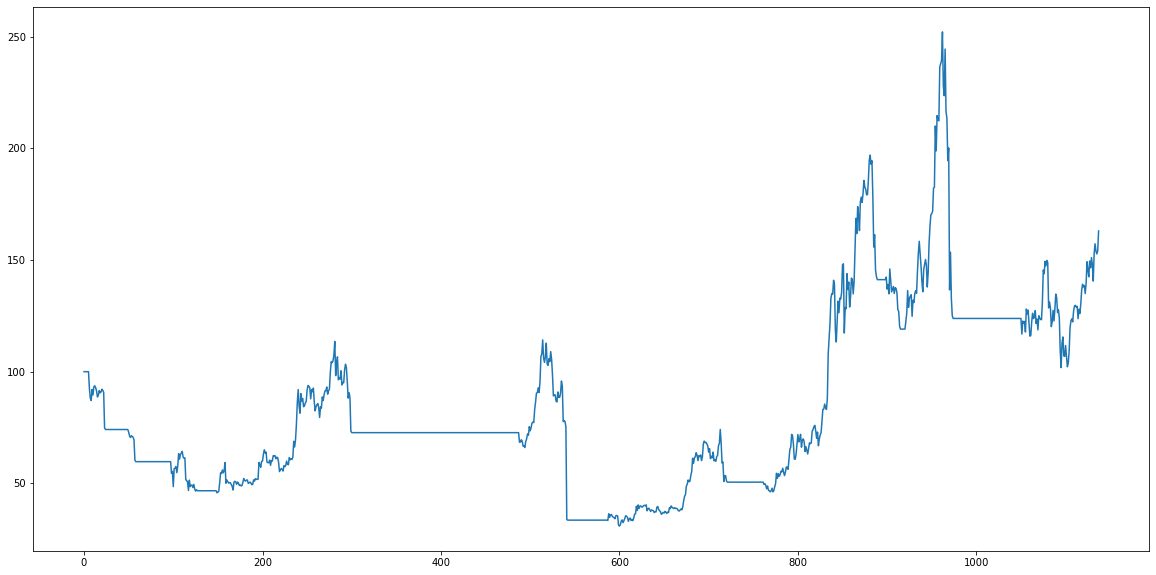

MA: [5, 240]  Strategy Value: 291.1691959634734 No Of Trades: 13


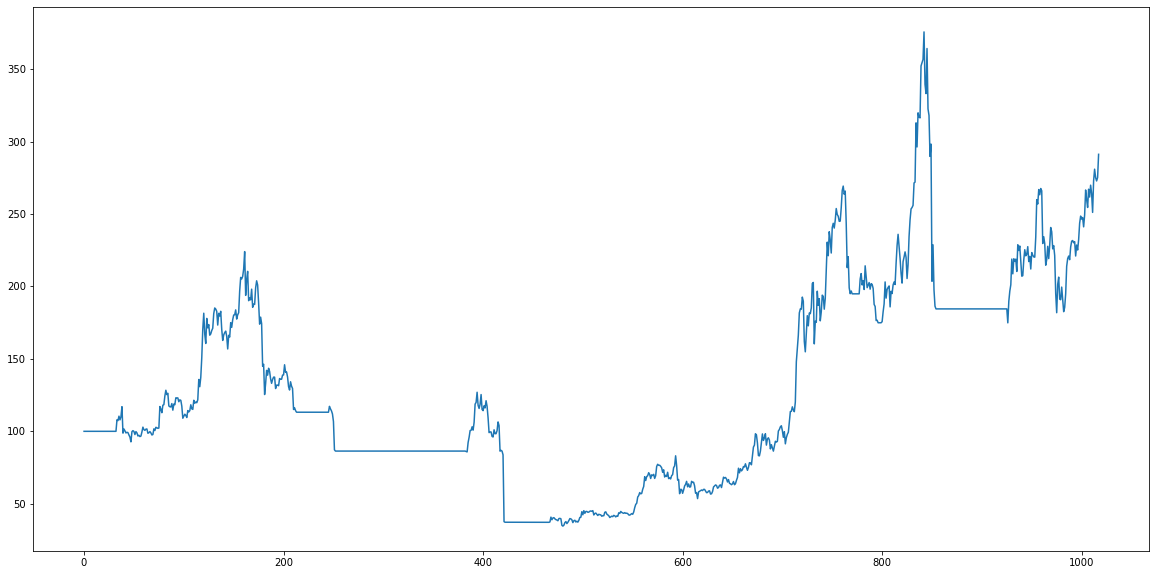

MA: [10, 15]  Strategy Value: 29.513582770077864 No Of Trades: 71


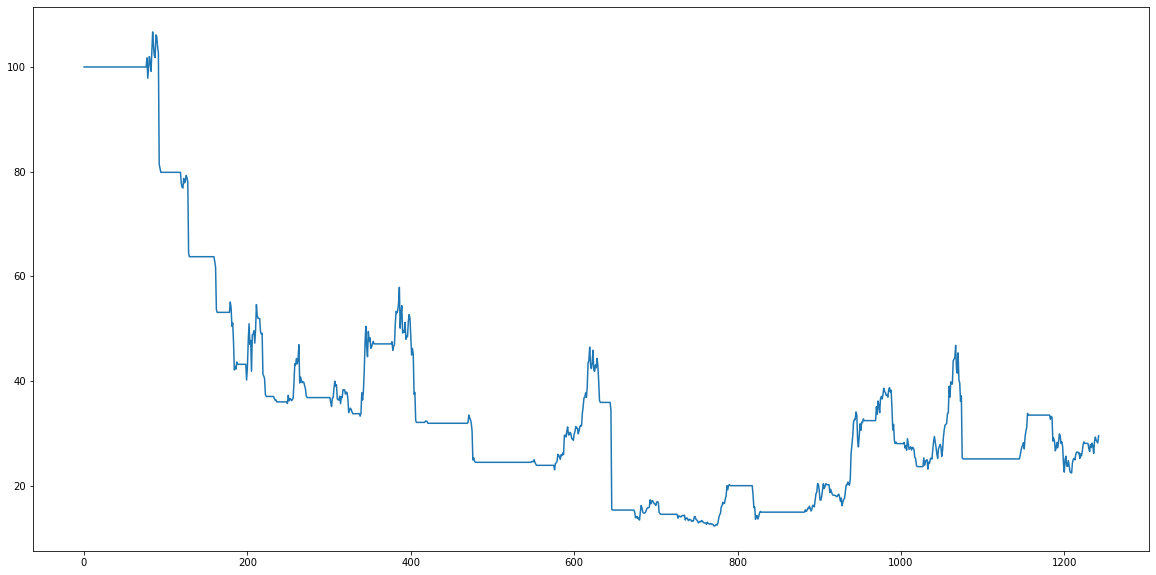

MA: [10, 20]  Strategy Value: 407.60104890027844 No Of Trades: 40


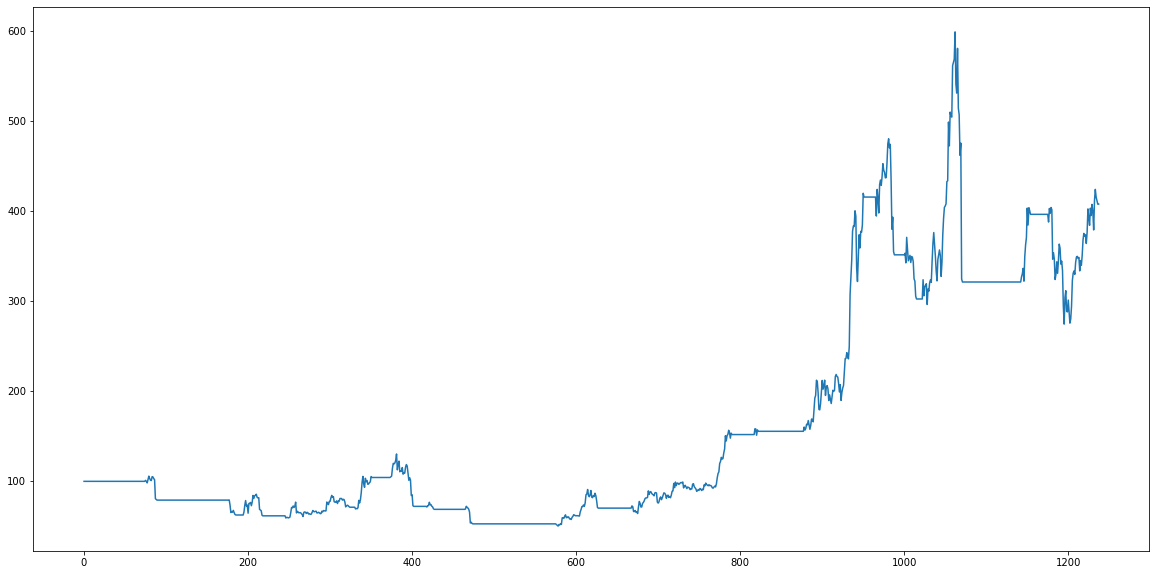

MA: [10, 60]  Strategy Value: 314.39828344864276 No Of Trades: 23


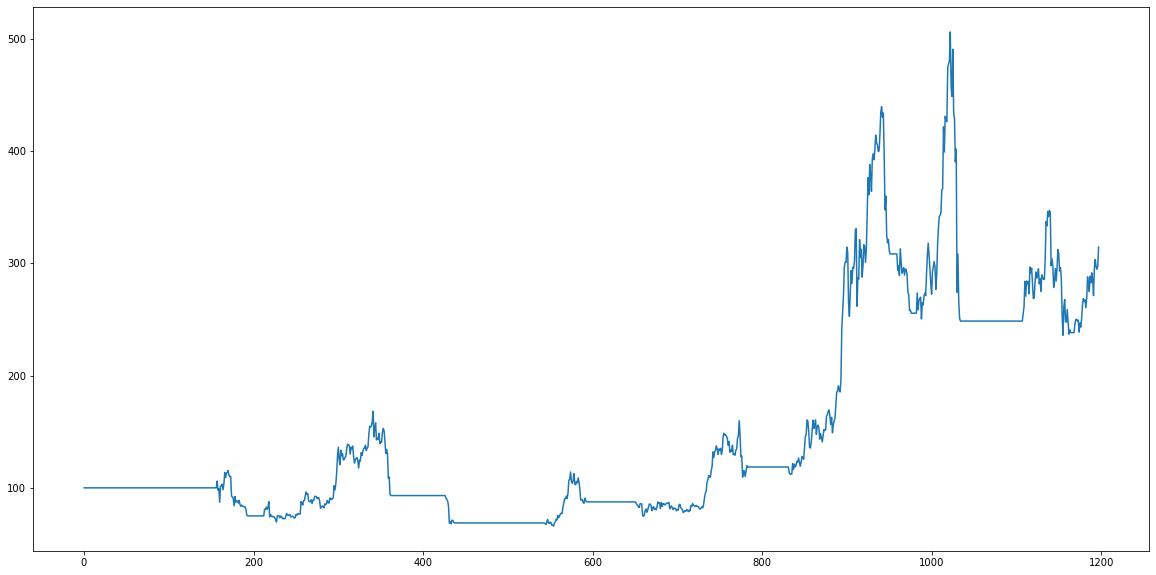

MA: [10, 120]  Strategy Value: 197.75496233734174 No Of Trades: 15


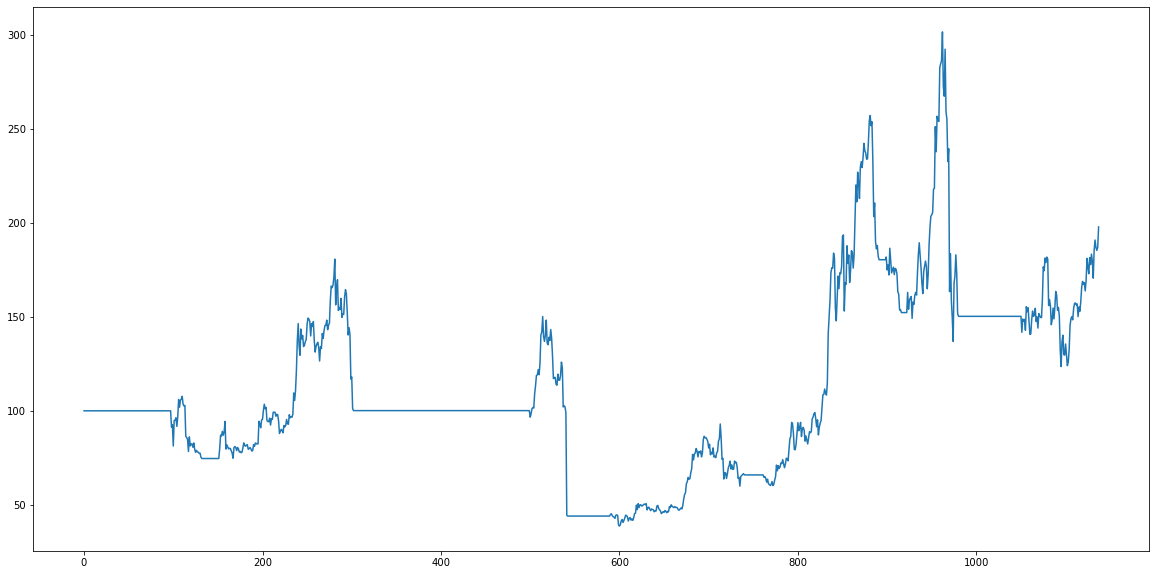

MA: [10, 240]  Strategy Value: 420.06485863083986 No Of Trades: 13


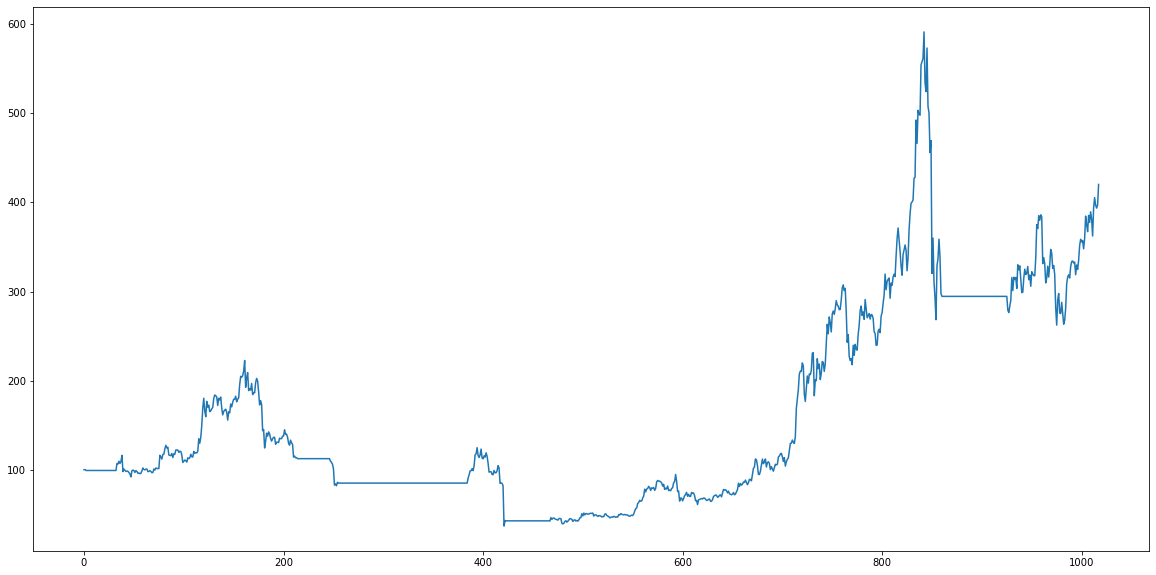

MA: [15, 20]  Strategy Value: 107.62278027776124 No Of Trades: 70


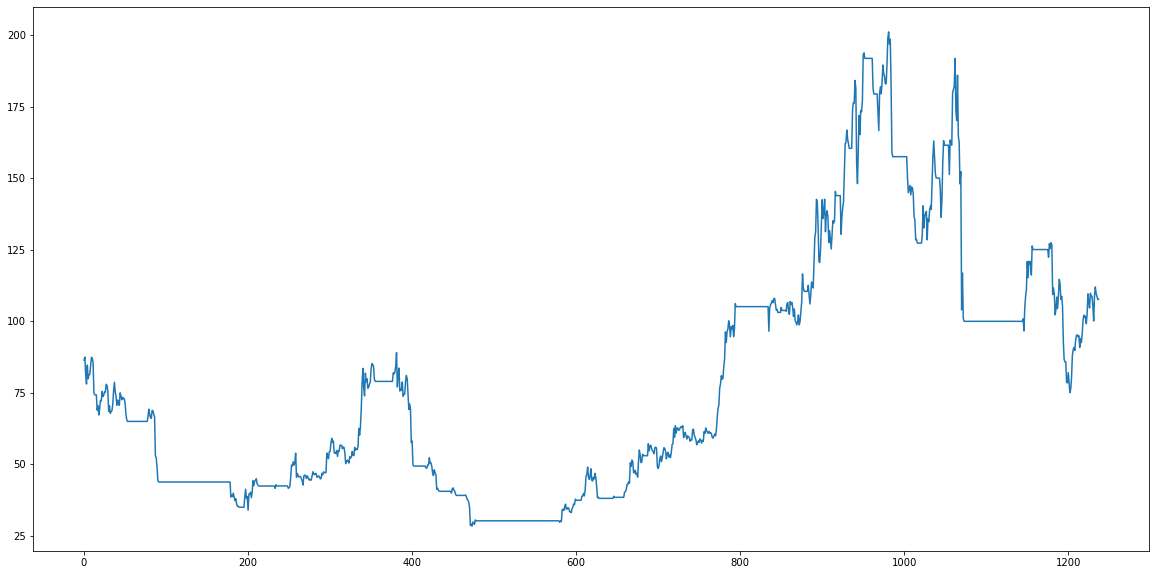

MA: [15, 60]  Strategy Value: 235.56774670690515 No Of Trades: 25


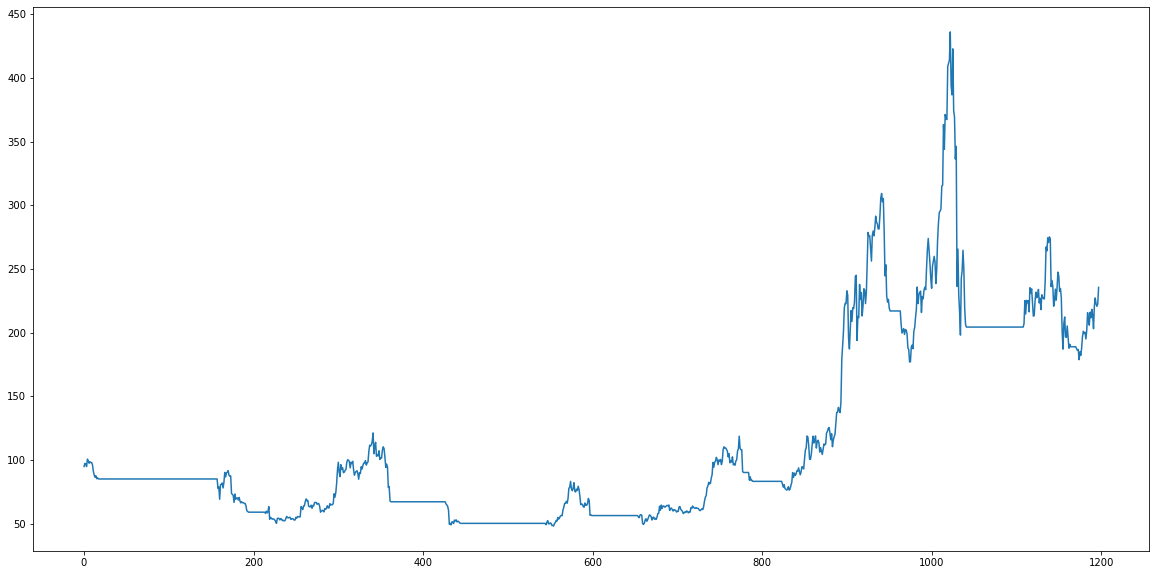

MA: [15, 120]  Strategy Value: 352.83353030796064 No Of Trades: 11


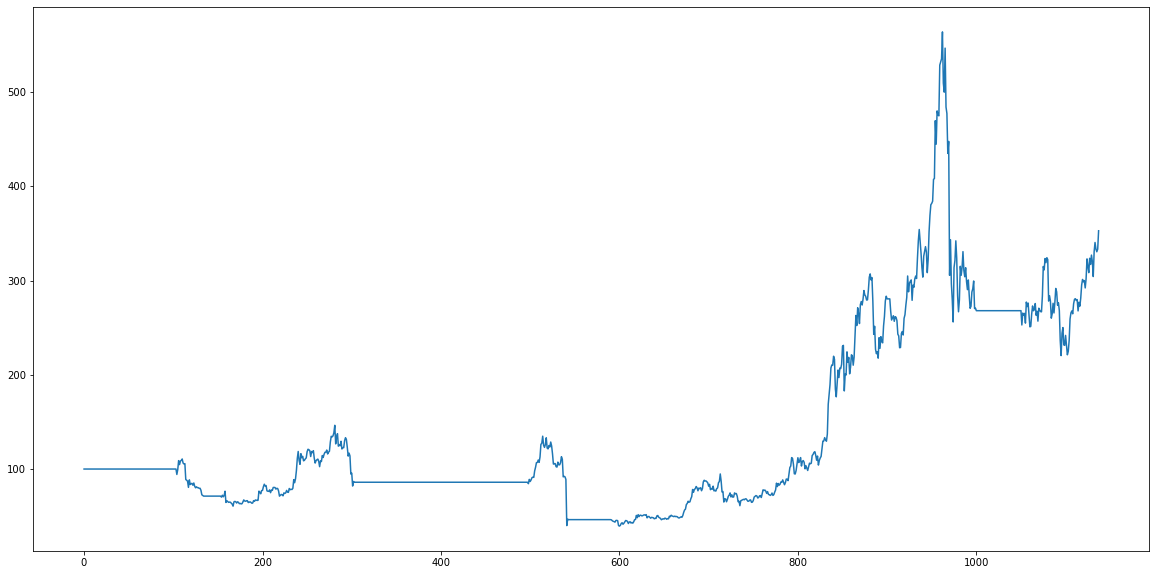

MA: [15, 240]  Strategy Value: 260.79326969863064 No Of Trades: 11


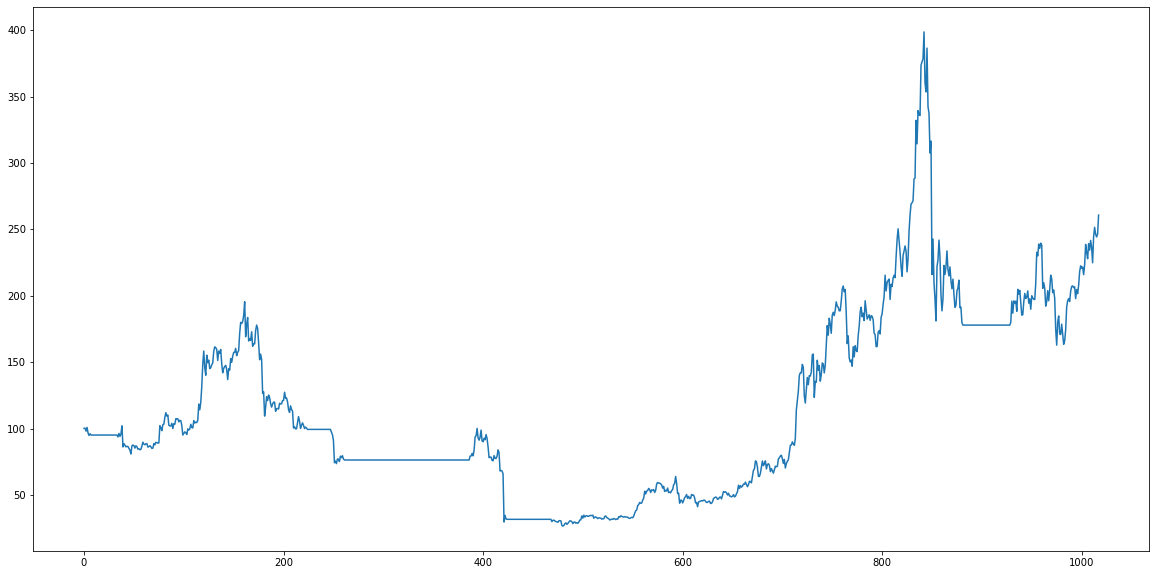

MA: [20, 60]  Strategy Value: 112.25008276184954 No Of Trades: 21


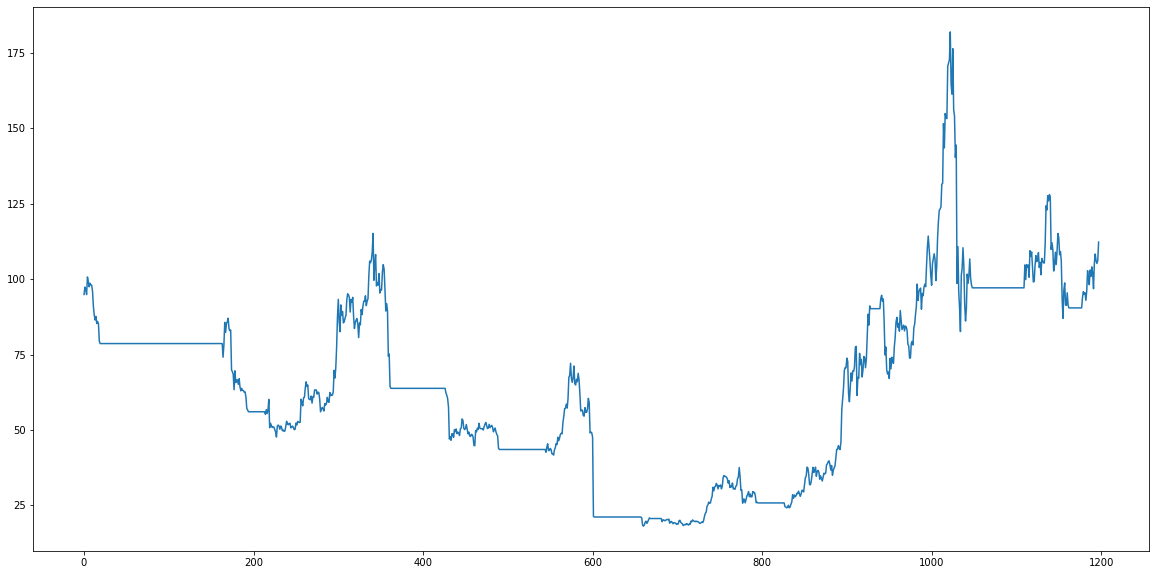

MA: [20, 120]  Strategy Value: 211.32988438704712 No Of Trades: 17


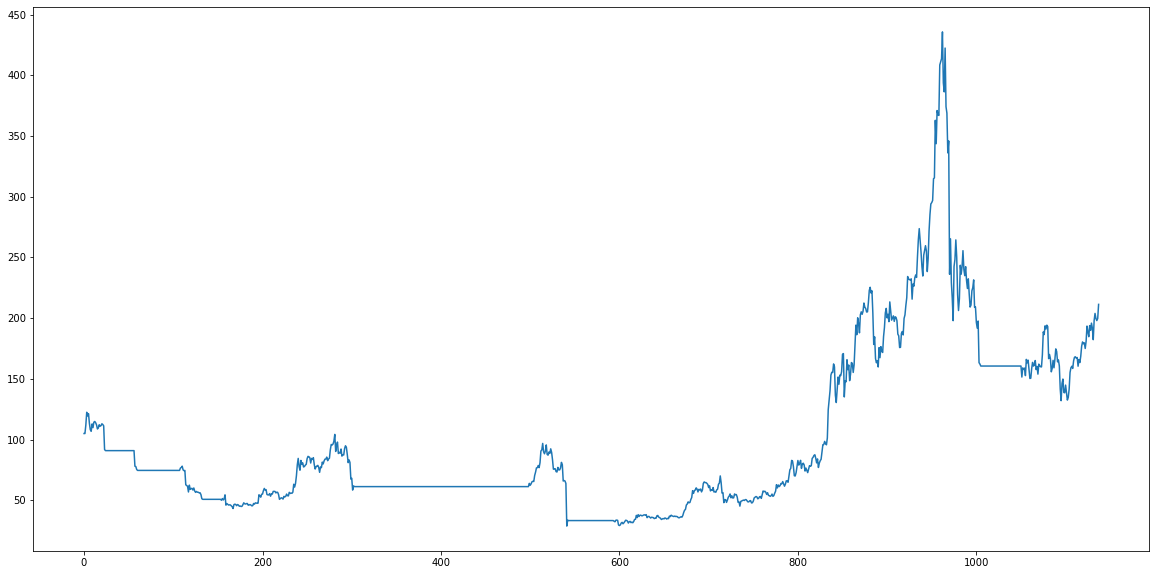

MA: [20, 240]  Strategy Value: 221.34954254436335 No Of Trades: 11


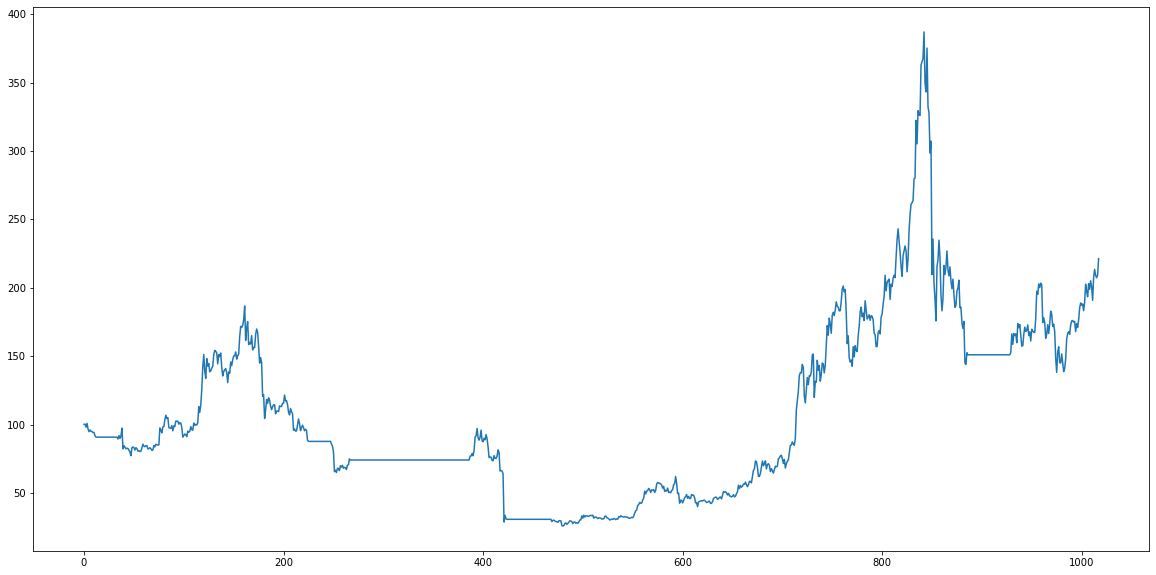

MA: [60, 120]  Strategy Value: 161.98662261316974 No Of Trades: 11


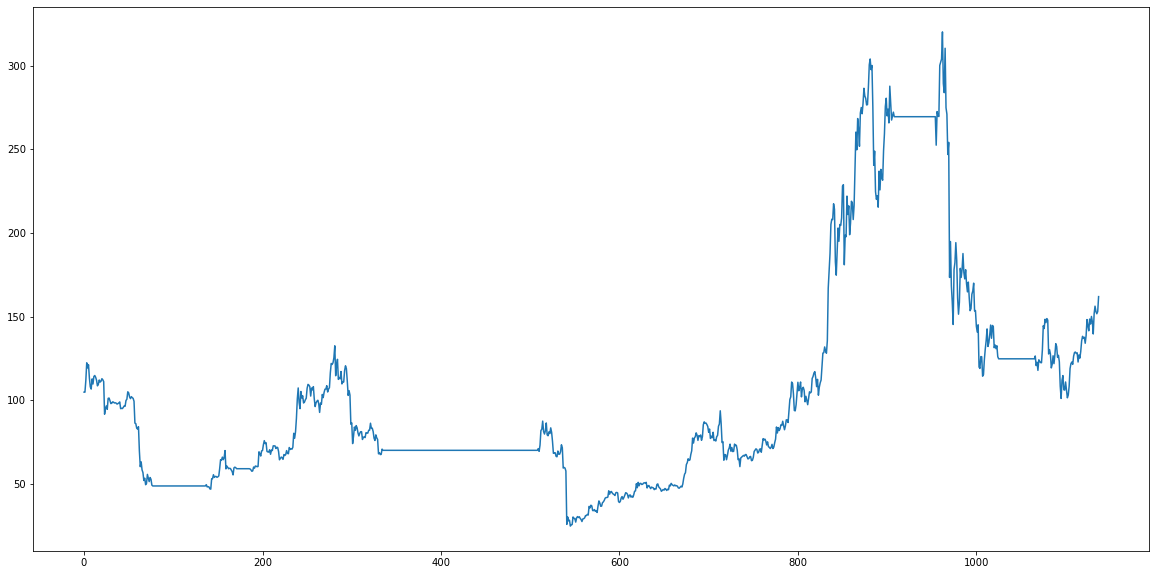

MA: [60, 240]  Strategy Value: 515.1586441867563 No Of Trades: 7


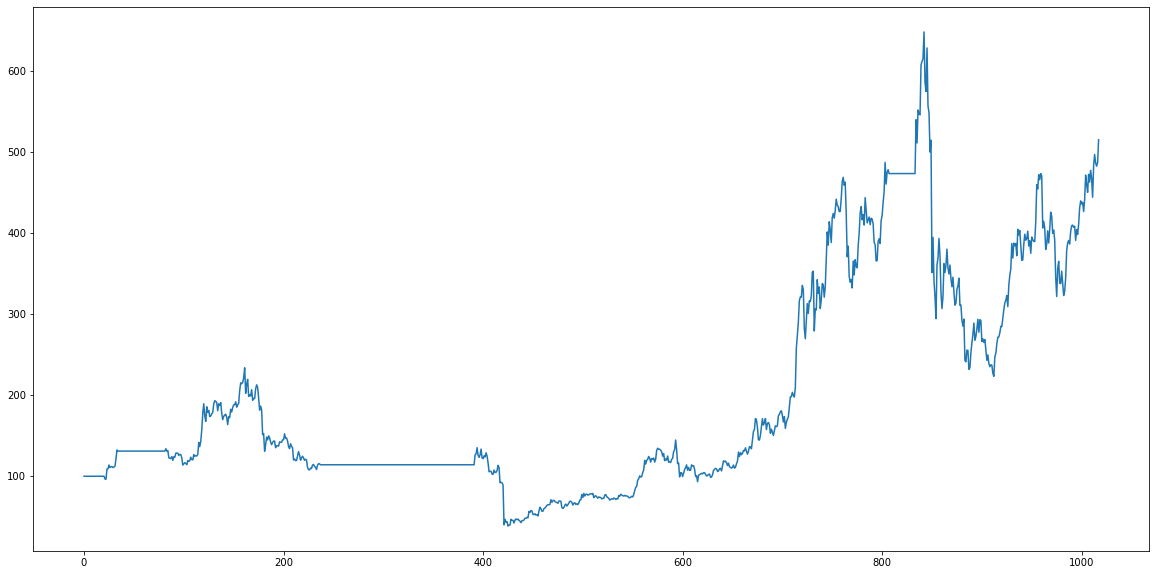

MA: [120, 240]  Strategy Value: 372.0561412847491 No Of Trades: 9


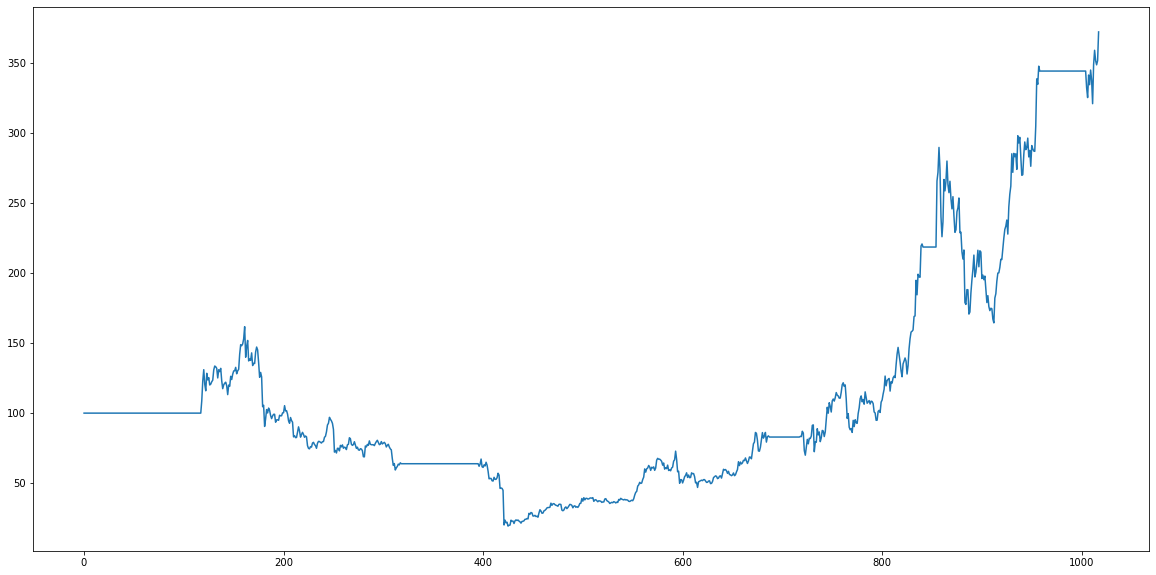

Wall time: 14.5 s


In [131]:
%%time
#Get Data
#NIFTY
# url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1189987200&period2=1635897600&interval=1d&events=history&includeAdjustedClose=true'
#Crypto
url = 'https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1438905600&period2=1635897600&interval=1d&events=history&includeAdjustedClose=true'
dataMain = pd.read_csv(url).dropna()[-1260:]

strategyStatsDictList = list()

for j in MAcombo:
    data = dataMain.copy()
    data['fastMA'] = talib.KAMA(data['Close'],j[0])
    data['slowMA'] = talib.KAMA(data['Close'],j[1])
    data['MAC'] = data['fastMA']/data['slowMA']
    data = data.iloc[::-1].reset_index(drop=True)
    data = data[['Date', 'Close', 'MAC']]
    data['assetReturns'] = 1 + np.log(data['Close'] / data['Close'].shift(-1))
    data = data.dropna()
    data['strategyReturn'] = data['assetReturns']
    data.loc[data['MAC'].shift(-1) < 1, 'strategyReturn'] = 1
    
    #Brokerage Adjusted Return
    initialPrice = 100
    lastState = 0
    brokerage = 0.01
    noTrades = 0
    assetSeries = list()
    for i in range(2, len(data)):
        chng = data['strategyReturn'][-i:-i+1].values[0]
        if chng == 1:
            currentState = 0
        else:
            currentState = 1
        if currentState == lastState:
            initialPrice = initialPrice * data['strategyReturn'][-i:-i+1].values
            assetSeries.append(initialPrice)
        else:
            initialPrice = initialPrice * (data['strategyReturn'][-i:-i+1].values - brokerage)
            assetSeries.append(initialPrice)
            noTrades = noTrades + 1
        lastState = currentState
    print('MA:', j, ' Strategy Value:',assetSeries[-1][0], 'No Of Trades:', noTrades)
    plt.plot(assetSeries)
    plt.show()
    strategyStatsDictList.append({
        'MA' : j,
        'Strategy Value' : assetSeries[-1][0],
        'No. Of Trades:': noTrades
    })

In [130]:
print('For KAMA with 100bp brokerage')
pd.DataFrame(strategyStatsDictList).sort_values(by='Strategy Value', ascending=False).head(20)

For KAMA with 100bp brokerage


,MA,Strategy Value,No. Of Trades:
18,"[5, 60]",184.676762,21
23,"[10, 60]",178.089022,17
21,"[10, 15]",157.680743,63
12,"[3, 60]",146.924884,27
20,"[5, 240]",130.497313,21
5,"[2, 60]",112.458432,37
31,"[20, 120]",112.217311,13
11,"[3, 20]",108.549938,45
28,"[15, 120]",105.203188,17
25,"[10, 240]",102.449556,13
